# Downloading Data for Local Use

These commands download all the necessary data to work locally for convenience.  
Note: The `aws configure` command requires your AWS Access Key ID and Secret Access Key, which should be stored securely in a `.env` file that is ignored by Git (via `.gitignore`).  
A `ls` command is run beforehand to ensure no file names are misdefined.

```bash
aws configure

poetry run aws s3 ls s3://zrive-ds-data/groceries/sampled-datasets/
poetry run aws s3 cp s3://zrive-ds-data/groceries/sampled-datasets/abandoned_carts.parquet ./abandoned_carts.parquet
poetry run aws s3 cp s3://zrive-ds-data/groceries/sampled-datasets/inventory.parquet ./inventory.parquet
poetry run aws s3 cp s3://zrive-ds-data/groceries/sampled-datasets/orders.parquet ./orders.parquet
poetry run aws s3 cp s3://zrive-ds-data/groceries/sampled-datasets/regulars.parquet ./regulars.parquet
poetry run aws s3 cp s3://zrive-ds-data/groceries/sampled-datasets/users.parquet ./users.parquet

poetry run aws s3 ls s3://zrive-ds-data/groceries/box_builder_dataset/
poetry run aws s3 cp s3://zrive-ds-data/groceries/box_builder_dataset/feature_frame.csv ./feature_frame.csv


Install pyarrow (reading files .parquet) and seaborn (graphics) with poetry add

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

In [38]:
RUTE = "../../data/"

ABANDONED_CARTS_PARQUET = f"{RUTE}abandoned_carts.parquet"
INVENTORY_PARQUET = f"{RUTE}inventory.parquet"
ORDERS_PARQUET = f"{RUTE}orders.parquet"
REGULARS_PARQUET = f"{RUTE}regulars.parquet"
USERS_PARQUET = f"{RUTE}users.parquet"

FEATURE_FRAME_CSV = f"{RUTE}feature_frame.csv"

In [39]:
orders = pd.read_parquet(ORDERS_PARQUET)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [40]:
orders.tail()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
64396,4026096910468,f524eaf26b76bc6226747768f120ffcd23d5c3d52a0a19...,2022-03-13 10:14:22,2022-03-13,5,"[33981947707524, 34284951273604, 3428495127360..."
64488,4026464993412,aa5e21db3186dcd84c161719c5ade8a19adb853ea8bfef...,2022-03-13 18:30:31,2022-03-13,3,"[33803540725892, 34284950519940, 3437091504141..."
64499,4026553434244,14be3833c19e0a1fd7e6db0e5375a3d1dcc9efafcb0e69...,2022-03-13 20:11:50,2022-03-13,11,"[39283356663940, 39283356663940, 4015514504410..."
64523,4026656030852,500027bf392bfa9ef527919569fba44904d429155b7cf4...,2022-03-13 22:29:24,2022-03-13,4,"[33824368033924, 33824368033924, 3382436803392..."
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,"[33826472558724, 34037939437700, 3428495186342..."


## Observaciones

- **user_id** es un UUID.
- Se podría eliminar la columna **order_date** debido a su redundancia.
- **user_order_seq**: número de veces que un usuario ha realizado un pedido.
- **ordered_items**: lista con los IDs de cada ítem. Como se observa en varias filas,  
  la cantidad de un mismo ítem se representa añadiendo varias veces un mismo ID a la lista.


In [41]:
orders = orders.drop("order_date", axis=1)

In [42]:
regulars = pd.read_parquet(REGULARS_PARQUET)
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [43]:
regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


## Observaciones

- Regulars son los ítems que se guardan los usuarios pero tampoco implica que los vayan a comprar
- Como en orders se tienen los ítems en una lista ordered_items, se podría dividir ese array por filas
y unir con otros datasets haciendo un rename a través de la columna **variant_id**

In [44]:
abandoned_carts = pd.read_parquet(ABANDONED_CARTS_PARQUET)
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [45]:
abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


## Observaciones

- Abandoned carts son los pedidos que se abandonan
- La estructura es muy similar a la de orders
- Sería interesante ver cada cuantas orders hay un abandoned_cart

In [46]:
inventory = pd.read_parquet(INVENTORY_PARQUET)
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [47]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


## Observaciones

- El inventario no parece mostrar ninguna fecha, así que en principio muestra la actualidad. Hay que verificar esto.
- La diferencia entre price y compare_at_price es algún tipo de descuento
- Sería interesante hacer análisis de precio medio por ítem comprado respecto a ítem en inventario
- Se podría hacer análisis comparando por ítems, vendedores y tipos de producto, para ver los más demandados.

In [48]:
users = pd.read_parquet(USERS_PARQUET)
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [49]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [50]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [83]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923
std,1.365753,0.869577,1.026246,0.289086,0.995603
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000


## Observaciones

- Las variables count son muchas nulas: 1. Formulario opcional 2. Formulario nuevo sin datos del pasado
- Podríamos hacer un análisis por user_segment o por región para ver si hay alguna diferencia.
- Análisis por cohorte para ver el estado del negocio
- Ver si los usuarios que tienen bebés o niños compran más, y en cuanta diferencia
- La media de adultos en casa es de 2. El 75% son 2 o menos, pero hay un 25% que llega hasta 7 adultos
- El 50% de las familias no tiene niños, un 25% tiene 0 o 1, y hay un 25% que tiene muchos niños aumentando la media a 1
- La mayoría de familias no tienen bebés, únicamente el 7%
- El 50% no tienen pets, el 25% tiene 0 o 1, y luego el otro 25% tienen muchos pets

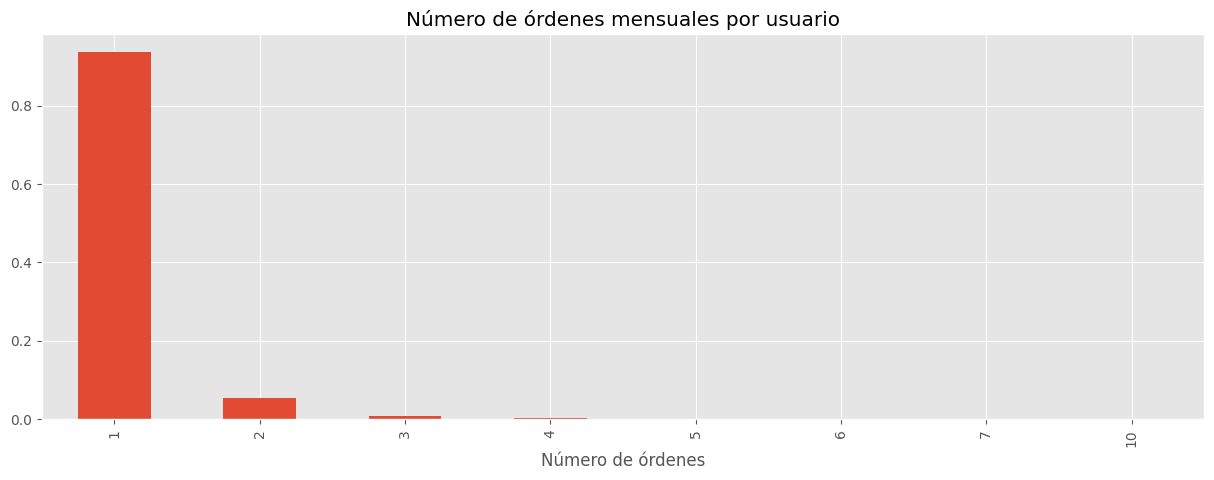

In [63]:
orders['order_date'] = pd.to_datetime(orders['created_at'])

orders['order_month'] = orders['order_date'].dt.to_period('M')

order_counts = orders.groupby(['user_id', 'order_month']).size()

user_distribution = order_counts.value_counts().sort_index()

user_distribution_normalized = user_distribution / user_distribution.sum()

user_distribution_normalized.plot(kind='bar', figsize=(15, 5))

plt.xlabel('Número de órdenes')
plt.title('Número de órdenes mensuales por usuario')
plt.show()

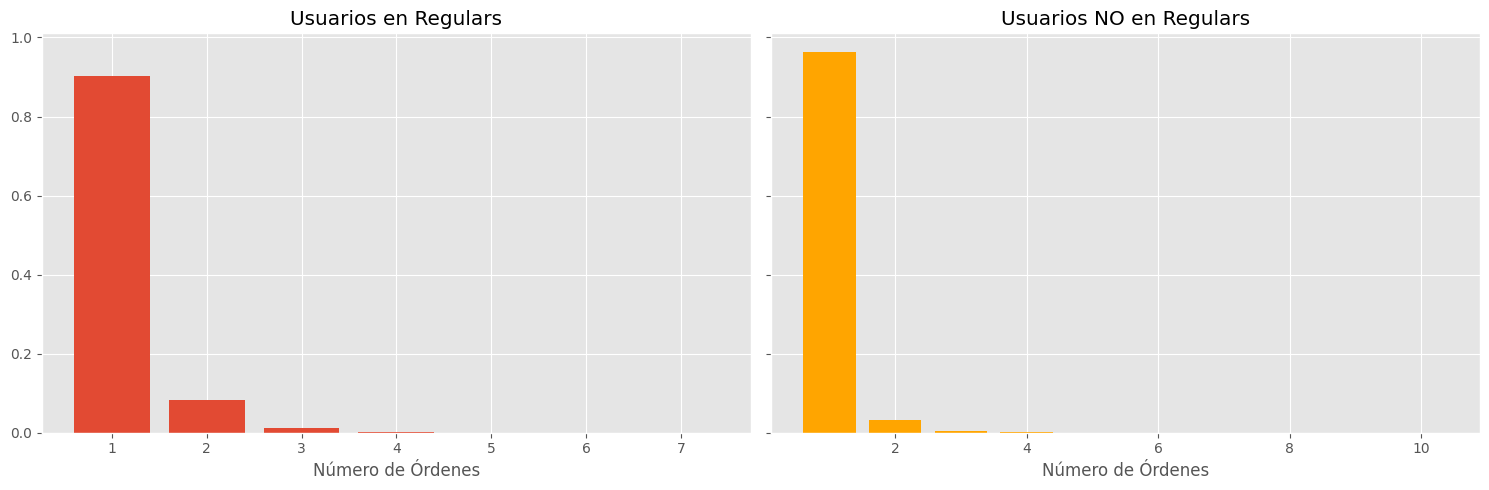

In [ ]:
regular_users = set(regulars['user_id']) 
users_with_orders = set(order_counts.index.get_level_values(0))

users_in_regulars = users_with_orders.intersection(regular_users)
users_not_in_regulars = users_with_orders.difference(regular_users)

orders_regulars = order_counts.loc[order_counts.index.get_level_values(0).isin(users_in_regulars)]
orders_non_regulars = order_counts.loc[order_counts.index.get_level_values(0).isin(users_not_in_regulars)]

user_dist_regulars = orders_regulars.value_counts().sort_index()
user_dist_non_regulars = orders_non_regulars.value_counts().sort_index()

user_dist_regulars_normalized = user_dist_regulars / user_dist_regulars.sum()
user_dist_non_regulars_normalized = user_dist_non_regulars / user_dist_non_regulars.sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axes[0].bar(user_dist_regulars_normalized.index, user_dist_regulars_normalized.values)
axes[0].set_title("Usuarios en Regulars")
axes[0].set_xlabel("Número de Órdenes")

axes[1].bar(user_dist_non_regulars_normalized.index, user_dist_non_regulars_normalized.values, color='orange')
axes[1].set_title("Usuarios NO en Regulars")
axes[1].set_xlabel("Número de Órdenes")

plt.tight_layout()
plt.show()

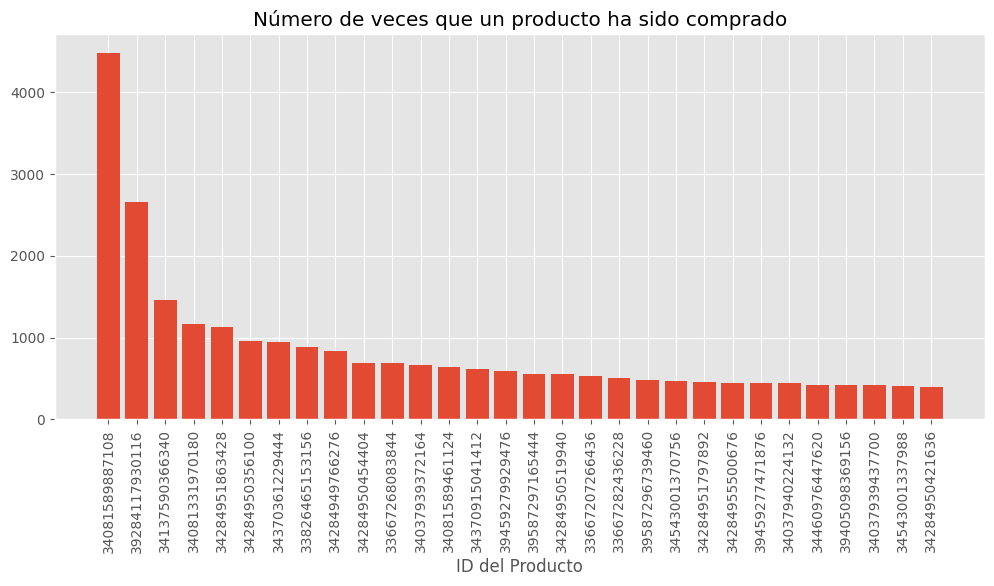

In [72]:
orders_exploded = orders.explode('ordered_items')

item_counts = orders_exploded['ordered_items'].value_counts()

top_30_items = item_counts.head(30)

plt.figure(figsize=(12, 5))
plt.bar(top_30_items.index.astype(str), top_30_items.values)
plt.xlabel("ID del Producto")
plt.title("Número de veces que un producto ha sido comprado")
plt.xticks(rotation=90)
plt.show()

In [75]:
top_3_items = item_counts.head(3).reset_index()

top_3_items.columns = ['variant_id', 'n_times_purchased']

top_3_details = top_3_items.merge(inventory, on='variant_id', how='inner')

top_3_details

,variant_id,n_times_purchased,price,compare_at_price,vendor,product_type,tags
0,34081589887108,4487,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


In [82]:
total_users = users['user_id'].nunique()

abandoned_counts = abandoned_carts['user_id'].value_counts()

# 3. Calcular proporciones
abandoned_users = abandoned_counts.count()  # Usuarios que han abandonado al menos una vez

once_abandoned = (abandoned_counts == 1).sum()  # Usuarios que lo han olvidado una vez
multiple_abandoned = (abandoned_counts > 1).sum()  # Usuarios que lo han olvidado más de una vez

prob_to_abandon = (abandoned_users / total_users) * 100
prob_once_vs_multiple = (multiple_abandoned / abandoned_users) * 100

# 4. Imprimir resultados
print(f"Probabilidad de que un usuario haya abandonado al menos una vez: {prob_to_abandon:.2f}%")
print(f"Si un usuario ya ha abandonado, probabilidad de que abandone más de una vez: {prob_once_vs_multiple:.2f}%")

Probabilidad de que un usuario haya abandonado al menos una vez: 69.01%
Si un usuario ya ha abandonado, probabilidad de que abandone más de una vez: 44.49%


In [88]:
# Convertir a datetime por si acaso
orders['created_at'] = pd.to_datetime(orders['created_at'])

# Obtener la fecha máxima en orders
max_date = orders['created_at'].max()

# Filtrar las orders del último año
last_year_orders = orders[orders['created_at'] >= (max_date - pd.DateOffset(years=1))]

# Explodear la columna ordered_items
orders_exploded = last_year_orders.explode('ordered_items')

# Contar el número total de ventas
total_sales = len(orders_exploded)

# Filtrar los productos que están en el inventory
inventory_products = set(inventory['variant_id'])
orders_in_inventory = orders_exploded[orders_exploded['ordered_items'].isin(inventory_products)]

# Contar el número de ventas de productos que están en el inventory
sales_in_inventory = len(orders_in_inventory)

# Proporción 1: Ventas en inventory / Total de ventas
sales_proportion = sales_in_inventory / total_sales

# Proporción 2: Productos distintos en inventory respecto a productos vendidos
unique_sold_products = orders_exploded['ordered_items'].nunique()
unique_sold_in_inventory = orders_in_inventory['ordered_items'].nunique()

products_proportion = unique_sold_in_inventory / unique_sold_products

# Calcular la proporción final
final_proportion = sales_proportion / products_proportion

# Mostrar resultados
print(f"Proporción de ventas en inventory: {sales_proportion:.2%}")
print(f"Proporción de productos vendidos que están en inventory: {products_proportion:.2%}")
print(f"Proporción final: {final_proportion:.2f}")

Proporción de ventas en inventory: 89.14%
Proporción de productos vendidos que están en inventory: 84.18%
Proporción final: 1.06


In [89]:
regulars_df = regulars.merge(inventory, on="variant_id", how="left")
regulars_df.head()

# Como se puede observar, hay regulars que no aparecen en el inventario. Puede ser porque haya productos que ya no estén disponibles, o porque el inventario
# esté outdated

,user_id,variant_id,created_at,month,order_date,order_month,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,2020-04,2020-04-30 15:07:03,2020-04,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,2020-05,2020-05-05 23:34:35,2020-05,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,2020-04,2020-04-30 15:07:03,2020-04,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,2020-05,2020-05-05 23:34:35,2020-05,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,2020-05,2020-05-06 14:42:11,2020-05,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


<Axes: xlabel='created_at'>

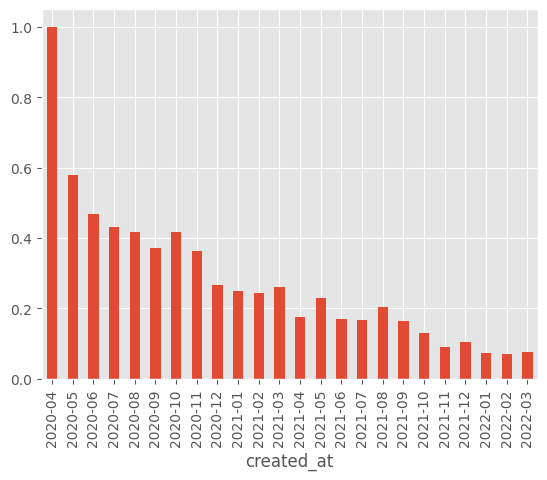

In [90]:
regulars_df.groupby(regulars_df.created_at.dt.to_period("M"))["price"].apply(lambda x: x.isna().sum() / len(x)).plot(kind="bar")

# Miro por meses con el atributo price debido a que es uno de los que es nulo. Calculo cuántos de los productos son nulos sobre el total,
# para tenerlo normalizado

<Axes: xlabel='user_order_seq'>

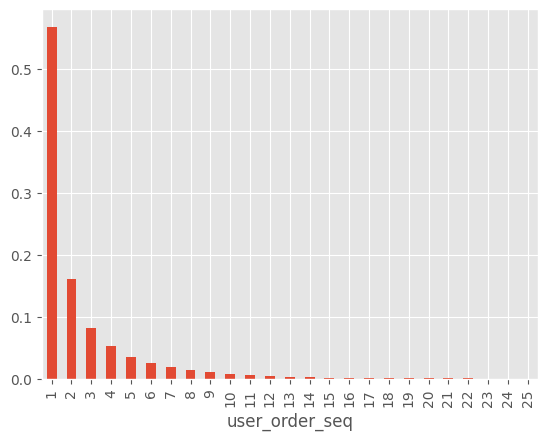

In [92]:
orders["user_order_seq"].value_counts(normalize=True).plot(kind="bar")

# Como user_order_seq nos muestra la cantidad de veces que ha comprado un user, calculo cuál es la proporción que más se repite

# Conclusiones:
- La mayoría de usuarios únicamente una order al mes, a excepción de alguno que hace 2 orders
- La diferencia entre usuarios regular y no regular respecto a orders mensuales es pequeña (únicamente cuando hacen 2 orders)
- Existen 3 productos que por diferencia se han comprado muchas veces. Sin embargo, en el inventario solo tenemos datos del top 1
- El producto top 1 es un brick de leche de oatly
- La probabilidad de que un usuario haya abandonado un carrito es un 69.01%, lo cual es una probabilidad muy alta
- La probabilidad de volver a abandonar un carrito es menor una vez se ha abandonado 1 una vez, y disminuye en un 25% aprox
- Como la proporción entre las ventas de los productos que están en inventory del último año, y el número de productos vendidos que están
  en inventory es cercana a 1, nos indica que probablemente la razón por la que están en inventory es porque simplemente se vendan más
- Como conforme te acercas en el tiempo a la actualidad, hay menos regulars que faltan en inventory, eso nos quiere decir que el inventory
muestra la actualidad, y que los regulars que no aparecen es simplemente porque probablemente ya no estén disponibles algunos
- Como se ve en user_order_seq, más del 50% de los usuarios han puesto una order y ya no han vuelto (Falta de capacidad de retención)

In [97]:
feature_frame = pd.read_csv(FEATURE_FRAME_CSV)
feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [98]:
feature_frame.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [100]:
feature_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [104]:
info = ["variant_id", "order_id", "user_id", "created_at", "order_date"]
label = ["outcome"]
categorial = ["product_type", "vendor"]
binary = ["ordered_before", "abandoned_before"]

results = {}

for var in binary:
    counts = feature_frame[var].value_counts(normalize=True)
    mean_outcome = feature_frame.groupby(var)["outcome"].mean()

    results[var] = {
        "P(0)": counts.get(0, 0),
        "P(1)": counts.get(1, 0), 
        "Mean Outcome (0)": mean_outcome.get(0, 0), 
        "Mean Outcome (1)": mean_outcome.get(1, 0)
    }

results_df = pd.DataFrame.from_dict(results, orient="index")
results_df

,P(0),P(1),Mean Outcome (0),Mean Outcome (1)
ordered_before,0.978861,0.021139,0.008223,0.164967
abandoned_before,0.999391,0.000609,0.011106,0.717949


# Conclusiones:

- En el csv existen variables que ya se han computado anteriormente (ordered_before, abandoned_before, ...)
- La columna outcome nos indica si el producto se llegó a comprar
- Además, aparece al hacer head() muchas veces repetida el variant_id. Esto indica que para cada order de un user,
hay una fila por cada variant_id. Con lo cual, la probabilidad de que el outcome sea 0 es muy alta
- Como se observa, un producto que se haya comprado previamente, tiene una probabilidad mucho más alta de volverse a comprar
- Además, cuando se abandona un producto, la probabilidad de comprarse más adelante en otra order se incrementa mucho